### TODO List
1. Fix error produced by Alphalens
2. Factor data is dated on EOM while return is dated on trade days only. Data misalignment occurs
3. Return is not shifted properly

In [16]:
from Dataloader import Dataloader
import pandas as pd
import alphalens as al
import numpy as np

DATA_PATH = './data/'
        
dataloader = Dataloader(DATA_PATH)
factor_data = dataloader.load_factor('Beta', ['beta_12m', 'beta_1m'], '2014-02-01', '2015-05-10')
return_data = dataloader.load_return('daily ret.csv')
factor_data.loc[(['2014-04-30'], slice(None))]

beta_12m   beta_1m
date       asset                       
2014-04-30 SZ000000  1.135205  0.815572
           SZ000001  1.041902  0.178507
           SZ000002  0.929141  1.662627
           SZ000003  0.909286  0.927492
           SZ000004  1.023867  0.816863
...                       ...       ...
           SZ002439  1.433814  1.031263
           SZ002440       NaN  1.490198
           SZ002441       NaN  1.069573
           SZ002442  1.342174  1.389596
           SZ002443  1.200026  0.358594

[2444 rows x 2 columns]

In [13]:
tdate = ['2014-04-30']
day_factor_data = factor_data.loc[(tdate, slice(None))]['beta_1m'].fillna(method='ffill')
day_return_data = return_data.loc[(tdate)].fillna(method='ffill')

cleaned_factor_data = al.utils.get_clean_factor(day_factor_data, day_return_data, max_loss=1)
cleaned_factor_data

Dropped 65.9% entries from factor data: 65.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                        
2014-04-30 SZ000001 -0.001792  0.178507                1
           SZ000002 -0.005038  1.662627                5
           SZ000004  0.040185  0.816863                2
           SZ000005  0.013274  0.929042                2
           SZ000006 -0.008180  0.862632                2
...                       ...       ...              ...
           SZ002439  0.011162  1.031263                2
           SZ002440 -0.021189  1.490198                4
           SZ002441  0.010249  1.069573                3
           SZ002442  0.002451  1.389596                4
           SZ002443  0.002937  0.358594                1

[833 rows x 3 columns]

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-1.527158,0.725432,0.344909,0.370412,167,20.048019
2,0.727175,1.040039,0.900633,0.085875,166,19.927971
3,1.040851,1.277091,1.155768,0.067196,167,20.048019
4,1.279148,1.572204,1.431026,0.087726,166,19.927971
5,1.572527,3.578057,1.947430,0.330071,167,20.048019


Returns Analysis


,1D
Ann. alpha,NaN
beta,NaN
Mean Period Wise Return Top Quantile (bps),-30.989
Mean Period Wise Return Bottom Quantile (bps),-14.050
Mean Period Wise Spread (bps),-16.939


AttributeError: 'Index' object has no attribute 'freq'

<Figure size 432x288 with 0 Axes>

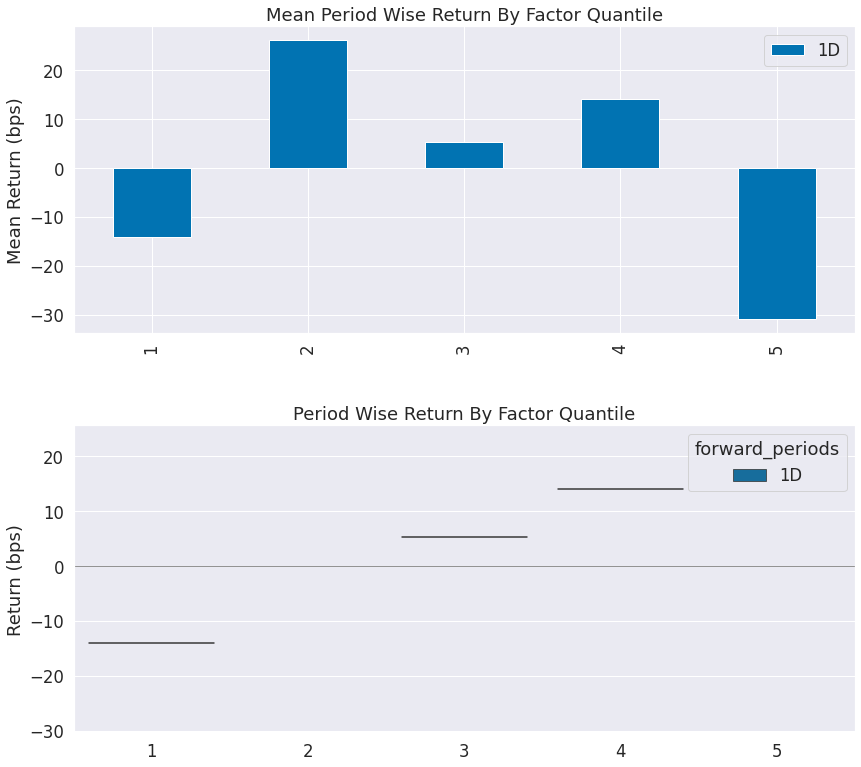

In [7]:
al.tears.create_full_tear_sheet(cleaned_factor_data)